In [4]:
%matplotlib inline
import numpy as np
import diffimTests as dit

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [ ]:
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620.)
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), templateNoNoise=False)
testResults3 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), templateNoNoise=False, skyLimited=False)

RUNNING: 100
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


In [ ]:
import cPickle, gzip
cPickle.dump((testResults1, testResults2, testResults3), file=gzip.GzipFile('tmp_pkl.gz', 'wb'))

In [ ]:
import cPickle, gzip
testResults1, testResults2, testResults3 = cPickle.load(gzip.GzipFile('tmp_pkl.gz', 'rb'))

/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


FN: 
ALstack           31.57
ALstack_decorr    33.83
SZOGY             30.33
ZOGY              28.31
dtype: float64
FP: 
ALstack           4.52
ALstack_decorr    3.78
SZOGY             8.52
ZOGY              5.22
dtype: float64
TP: 
ALstack           18.43
ALstack_decorr    16.17
SZOGY             19.67
ZOGY              21.69
dtype: float64


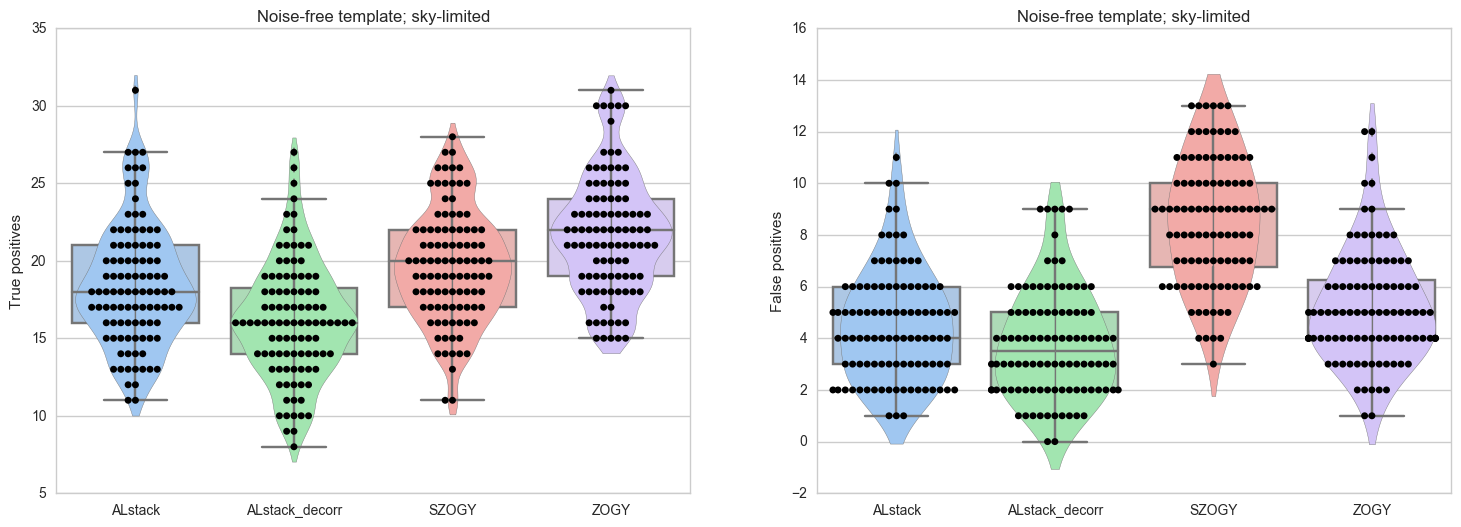

In [5]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited')

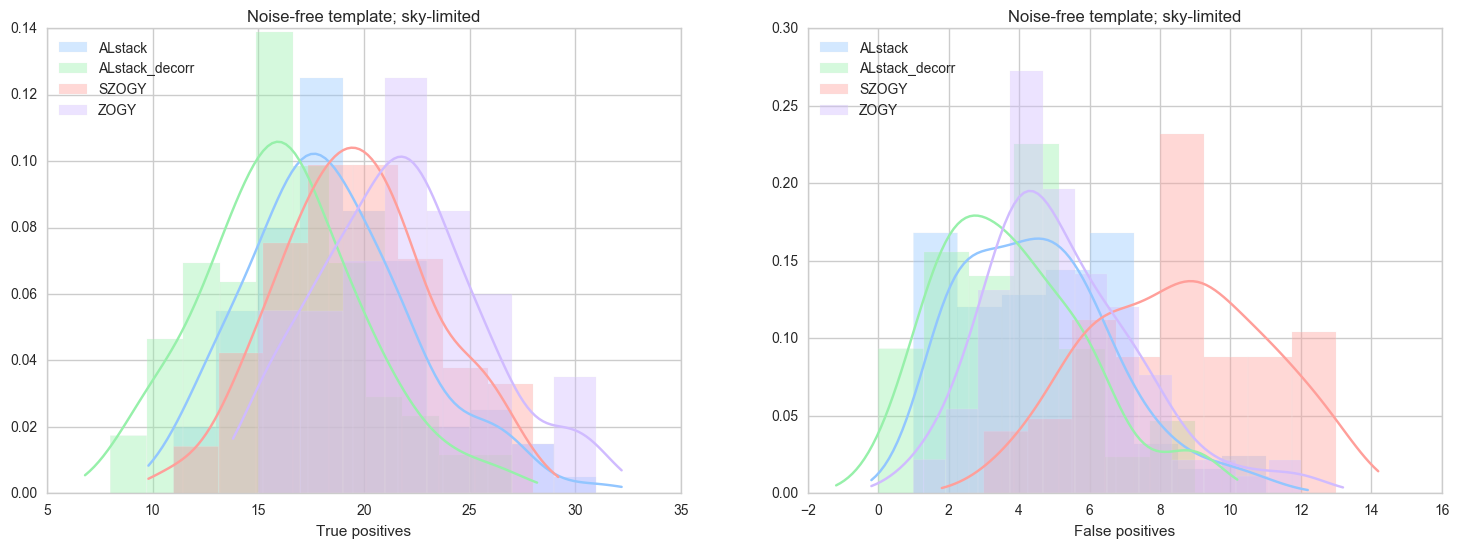

In [6]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', asHist=True, doPrint=False)

Noise-free template; sky-limited :
AL:		5.05316514091 +/- 1.01499740012
AL(decorr):	5.04472862833 +/- 1.01343620132
ZOGY:		5.02616701656 +/- 1.01187977987


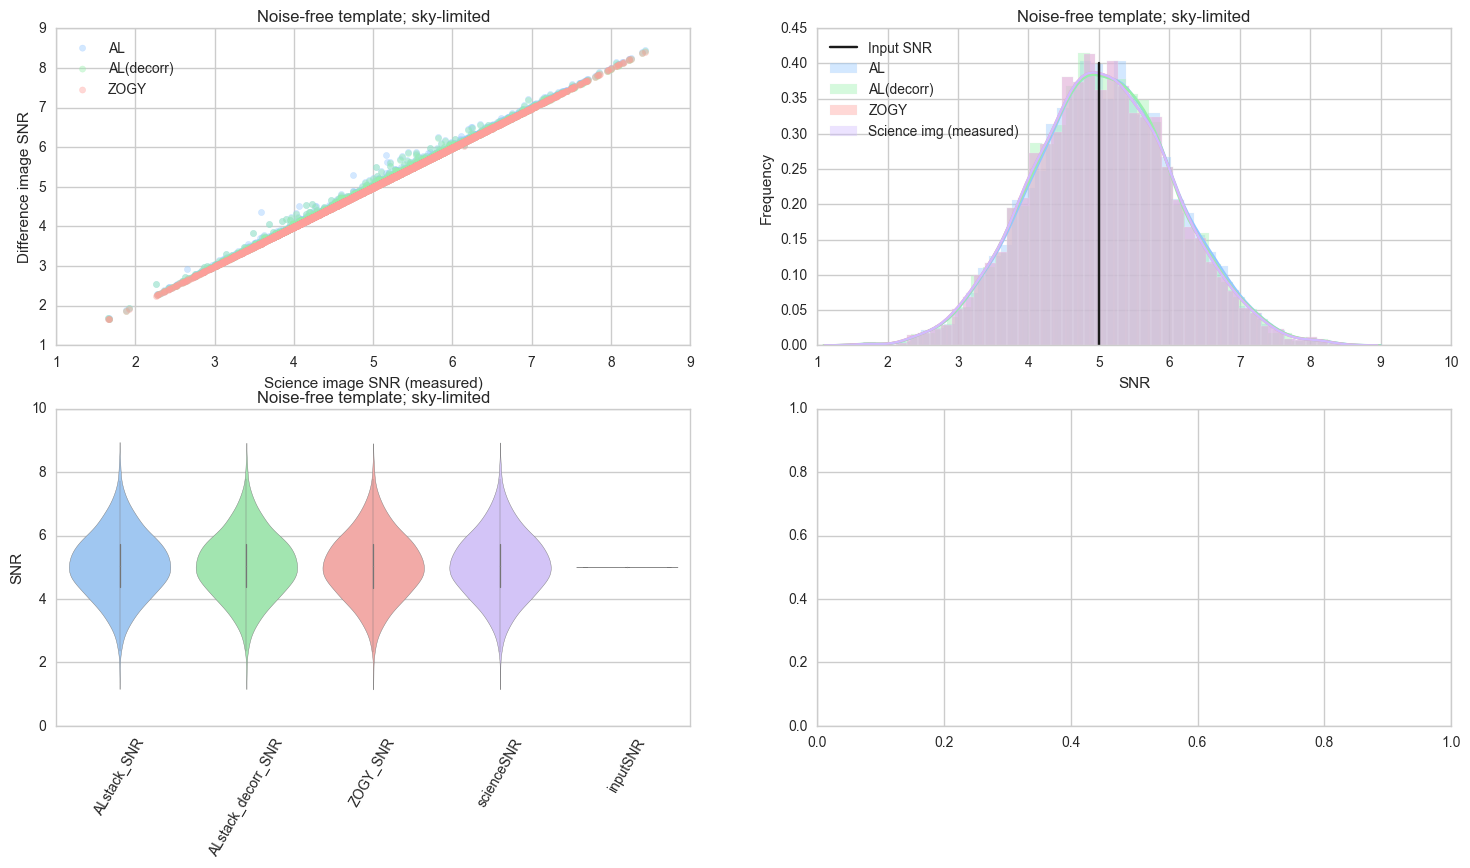

In [7]:
dit.multi.plotSnrResults(testResults1, title='Noise-free template; sky-limited')

In [ ]:
dit.multi.plotResults(testResults2, title='Noisy template; sky-limited')

In [ ]:
dit.multi.plotSnrResults(testResults2, title='Noisy template; sky-limited')

In [ ]:
dit.multi.plotResults(testResults3, title='Noisy template; not sky-limited')

In [ ]:
dit.multi.plotSnrResults(testResults3, title='Noisy template; not sky-limited')